In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [68]:
df=pd.read_csv('cars.csv')

In [69]:
col=[]
for i in df.columns:
    col.append(i.replace(' ',''))

In [70]:
df.columns=col

In [71]:
df.head()

mpg  cylinders cubicinches   hp weightlbs  time-to-60  year     brand
0  14.0          8         350  165      4209          12  1972       US.
1  31.9          4          89   71      1925          14  1980   Europe.
2  17.0          8         302  140      3449          11  1971       US.
3  15.0          8         400  150      3761          10  1971       US.
4  30.5          4          98   63      2051          17  1978       US.

In [72]:
df.isnull().sum()

mpg            0
cylinders      0
cubicinches    0
hp             0
weightlbs      0
time-to-60     0
year           0
brand          0
dtype: int64

In [73]:
df.dtypes

mpg            float64
cylinders        int64
cubicinches     object
hp               int64
weightlbs       object
time-to-60       int64
year             int64
brand           object
dtype: object

In [74]:
df.cubicinches.astype('int')

ValueError: invalid literal for int() with base 10: ' '

<h2>This means there are rows with <i><u>spaces</i></u>  for cubicinches column

In [75]:
df.loc[df.cubicinches==' ','cubicinches']=np.nan

In [76]:
df.isnull().sum()

mpg            0
cylinders      0
cubicinches    2
hp             0
weightlbs      0
time-to-60     0
year           0
brand          0
dtype: int64

In [77]:
df.cubicinches.fillna(value=df.cubicinches.median(),inplace=True)

In [90]:
df.cubicinches=df.cubicinches.astype('int')

In [78]:
df.isnull().sum()

mpg            0
cylinders      0
cubicinches    0
hp             0
weightlbs      0
time-to-60     0
year           0
brand          0
dtype: int64

In [80]:
df.weightlbs.head()

0    4209
1    1925
2    3449
3    3761
4    2051
Name: weightlbs, dtype: object

In [81]:
df.weightlbs.astype('int')

ValueError: invalid literal for int() with base 10: ' '

<h2> Same problem with weightlbs column

In [82]:
df.loc[df.weightlbs==' ','weightlbs']=np.nan

In [83]:
df.weightlbs.isnull().sum()

3

In [84]:
df.weightlbs.fillna(value=df.weightlbs.median(),inplace=True)

In [89]:
df.weightlbs=df.weightlbs.astype('int')

In [96]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df.brand=le.fit_transform(df.brand)

In [99]:
df.dtypes

mpg            float64
cylinders        int64
cubicinches      int32
hp               int64
weightlbs        int32
time-to-60       int64
year             int64
brand            int32
dtype: object

In [118]:
df.shape

(261, 8)

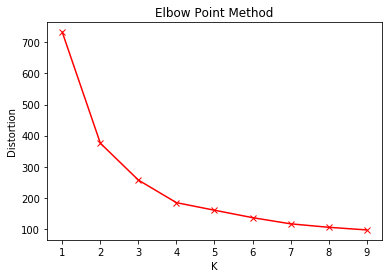

In [123]:
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
distortions = []
for i in range(1,10):
    kmeans=KMeans(n_clusters=i,verbose=0,n_jobs=-1)
    kmeans.fit(df)
    distortions.append(sum(np.min(cdist(df, kmeans.cluster_centers_, 'euclidean'), axis=1)) / df.shape[0]) 
    #The above line calculates the distance of each row from all the centeroids and then choses the minimum distance and adds them for ever example. 
k=range(1,10)
plt.xlabel('K')
plt.ylabel('Distortion')
plt.title('Elbow Point Method')
plt.plot(k, distortions, 'rx-')

Elbow Point occurs at k=4

In [126]:
kmeans=KMeans(n_clusters=4,verbose=1,n_jobs=-1,max_iter=500)
kmeans.fit(df)

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 13169177.738448892
start iteration
done sorting
end inner loop
Iteration 1, inertia 12460336.432316538
start iteration
done sorting
end inner loop
Iteration 2, inertia 12327564.807329822
start iteration
done sorting
end inner loop
Iteration 3, inertia 12297685.874793693
start iteration
done sorting
end inner loop
Iteration 4, inertia 12297685.874793693
center shift 0.000000e+00 within tolerance 9.149648e+00
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 14345433.75630895
start iteration
done sorting
end inner loop
Iteration 1, inertia 12666424.137953922
start iteration
done sorting
end inner loop
Iteration 2, inertia 12315678.533157365
start iteration
done sorting
end inner loop
Iteration 3, inertia 12305200.105091048
start iteration
done sorting
end inner loop
Iteration 4, inertia 12297353.11330165
start iteration
done sorting
end inner loop
Iteration 5, i

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
    n_clusters=4, n_init=10, n_jobs=-1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=1)

In [127]:
kmeans.cluster_centers_

array([[1.42638298e+01, 8.00000000e+00, 3.63297872e+02, 1.66276596e+02,
        4.35934043e+03, 1.28723404e+01, 1.97487234e+03, 2.00000000e+00],
       [3.09404762e+01, 3.98809524e+00, 9.65476190e+01, 7.09404762e+01,
        2.09261905e+03, 1.70238095e+01, 1.97730952e+03, 8.92857143e-01],
       [2.39466667e+01, 4.86666667e+00, 1.61720000e+02, 9.54533333e+01,
        2.79021333e+03, 1.59733333e+01, 1.97796000e+03, 1.38666667e+00],
       [1.77345455e+01, 6.96363636e+00, 2.73381818e+02, 1.24127273e+02,
        3.54914545e+03, 1.50000000e+01, 1.97618182e+03, 1.85454545e+00]])

These are the centers of 4 clusters